# Spam Classification Dataset
## Steps:
### 1. Data Loading
### 2. Data Exploration 
### 3. Data Preprocessing 
### 4. Machine Learning Models

In [5]:
import nltk

# Download the NLTK stopwords corpus
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omarelsisi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## Data Exploration 

In [62]:

# Load the dataset
data = pd.read_csv(r"C:\Users\WIN 11\Documents\archive (14)\Spam Email raw text for NLP.csv")


In [63]:
data.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [64]:

# Check the distribution of spam and non-spam emails
print(data['CATEGORY'].value_counts())

CATEGORY
0    3900
1    1896
Name: count, dtype: int64


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


## Data Preprocessing 

In [66]:
# Preprocessing
# Remove unnecessary columns
data = data[['MESSAGE', 'CATEGORY']]


In [67]:
data.head()

,MESSAGE,CATEGORY
0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",1
1,ATTENTION: This is a MUST for ALL Computer Use...,1
2,This is a multi-part message in MIME format.\n...,1
3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1
4,This is the bottom line. If you can GIVE AWAY...,1


In [68]:
data.shape 

(5796, 2)

In [69]:
data.describe()

,CATEGORY
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [70]:
data.isnull().sum()

MESSAGE     0
CATEGORY    0
dtype: int64

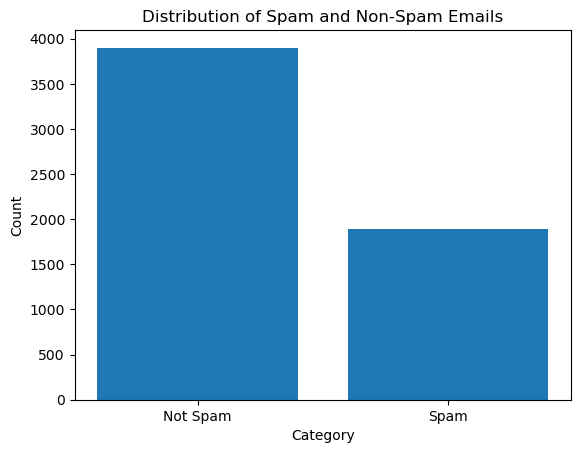

In [73]:
import matplotlib.pyplot as plt

# Plot the distribution of spam and non-spam emails
spam_counts = data['CATEGORY'].value_counts()
plt.bar(spam_counts.index, spam_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

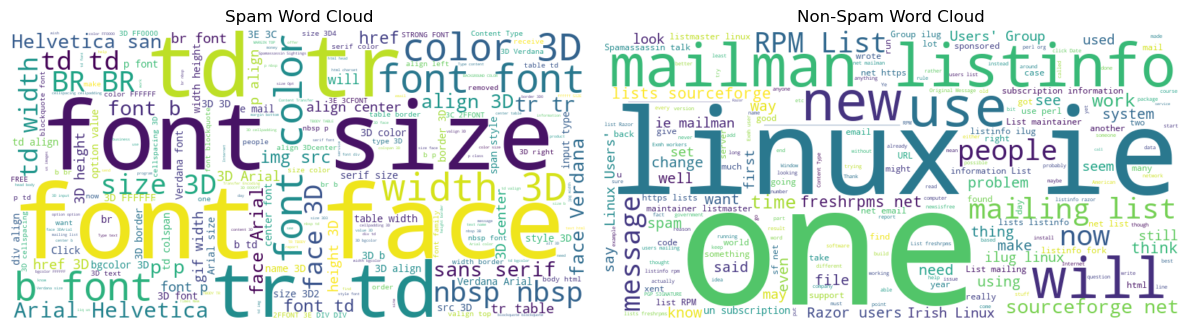

In [72]:
from wordcloud import WordCloud

# Extract spam and non-spam messages
spam_messages = data[data['CATEGORY'] == 1]['MESSAGE'].values
non_spam_messages = data[data['CATEGORY'] == 0]['MESSAGE'].values

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_spam_messages))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(122)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Non-Spam Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


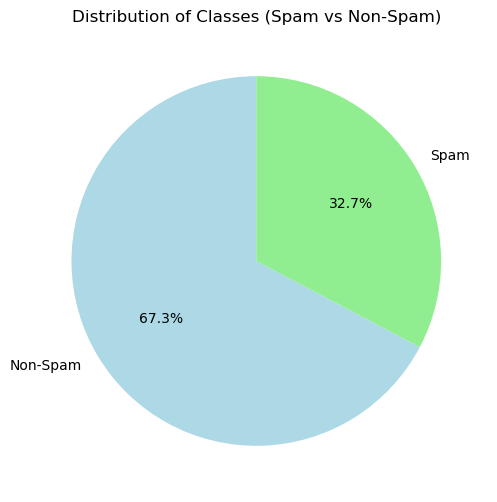

In [85]:
# Calculate the counts of each class in the target variable
class_counts = data['CATEGORY'].value_counts()
class_labels = ['Non-Spam', 'Spam']
# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Distribution of Classes (Spam vs Non-Spam)')
plt.show()


In [20]:
# Function to clean and normalize the text
def clean_text(text):
    # Remove special characters and digits
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

# Apply the clean_text function to the 'MESSAGE' column
data['MESSAGE'] = data['MESSAGE'].apply(clean_text)

In [21]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()


In [22]:

# Convert text data to numerical features
X = vectorizer.fit_transform(data['MESSAGE'])


In [23]:

# Target variable
y = data['CATEGORY']


### Splitting data into training (80 %) ,  test (20 %)

In [24]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RandomForest  Model

In [25]:
# Initialize the random forest classifier
classifier = RandomForestClassifier()

In [26]:
# Train the model
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)


In [34]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.93%


In [83]:

# Generate classification report and store it in 'report' variable
clf_report = classification_report(y_test, y_pred)
print('Classification Report:', clf_report)


Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       762
           1       0.98      0.96      0.97       398

    accuracy                           0.98      1160
   macro avg       0.98      0.97      0.98      1160
weighted avg       0.98      0.98      0.98      1160



## Naive Bayes Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [36]:
# Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [37]:
# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

In [38]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.10%


In [39]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       762
           1       0.98      0.81      0.89       398

    accuracy                           0.93      1160
   macro avg       0.95      0.90      0.92      1160
weighted avg       0.94      0.93      0.93      1160



## Gaussian Naive Bayes Model

In [42]:
# Train the Gaussian Naive Bayes classifier
gaussian_nb_classifier = GaussianNB()
gaussian_nb_classifier.fit(X_train.toarray(), y_train) # toarray() is used to convert sparse matrix to dense array

GaussianNB()

In [44]:
# Predict on the test set
y_pred = gaussian_nb_classifier.predict(X_test.toarray())  # toarray() for the test set as well

In [45]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.26%


In [46]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       762
           1       0.96      0.90      0.93       398

    accuracy                           0.95      1160
   macro avg       0.95      0.94      0.95      1160
weighted avg       0.95      0.95      0.95      1160



## SVC Model

In [47]:
from sklearn.svm import SVC

In [48]:
# Train the Support Vector Classifier
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [49]:
# Predict on the test set
y_pred = svc_classifier.predict(X_test)

In [50]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.71%


In [51]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       762
           1       1.00      0.96      0.98       398

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.99      1160
weighted avg       0.99      0.99      0.99      1160



## XGBoost Model

In [54]:
import xgboost as xgb

In [56]:
# Train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

In [59]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.19%


In [60]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       762
           1       0.97      0.98      0.97       398

    accuracy                           0.98      1160
   macro avg       0.98      0.98      0.98      1160
weighted avg       0.98      0.98      0.98      1160



## Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# Train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
# Predict on the test set
y_pred = decision_tree_classifier.predict(X_test)

In [66]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.26%


In [67]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       762
           1       0.93      0.93      0.93       398

    accuracy                           0.95      1160
   macro avg       0.95      0.95      0.95      1160
weighted avg       0.95      0.95      0.95      1160



## Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression

In [86]:
# Train the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)

LogisticRegression()

In [87]:
# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test)

In [88]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.33%


In [73]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       762
           1       0.99      0.93      0.96       398

    accuracy                           0.97      1160
   macro avg       0.98      0.96      0.97      1160
weighted avg       0.97      0.97      0.97      1160



# Done!